In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('./Downloads/beer_reviews.csv',delimiter=',')

In [3]:
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


## Общая информация о данных

In [4]:
data.shape

(1586614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,NaN,NaN,NaN,3130.099202,5578.103987,1.0,143.0,429.0,2372.0,28003.0
brewery_name,1586599,5742,Boston Beer Company (Samuel Adams),39444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_time,1586614.0,NaN,NaN,NaN,1224089280.012211,76544274.539238,840672001.0,1173224188.25,1239202881.5,1288568405.25,1326285348.0
review_overall,1586614.0,NaN,NaN,NaN,3.815581,0.720622,0.0,3.5,4.0,4.5,5.0
review_aroma,1586614.0,NaN,NaN,NaN,3.735636,0.697617,1.0,3.5,4.0,4.0,5.0
review_appearance,1586614.0,NaN,NaN,NaN,3.841642,0.616093,0.0,3.5,4.0,4.0,5.0
review_profilename,1586266,33387,northyorksammy,5817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beer_style,1586614,104,American IPA,117586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_palate,1586614.0,NaN,NaN,NaN,3.743701,0.682218,1.0,3.5,4.0,4.0,5.0
review_taste,1586614.0,NaN,NaN,NaN,3.79286,0.73197,1.0,3.5,4.0,4.5,5.0


In [7]:
data['review_overall'].describe()

count    1.586614e+06
mean     3.815581e+00
std      7.206219e-01
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: review_overall, dtype: float64

## Анализ количественной информации

<AxesSubplot: >

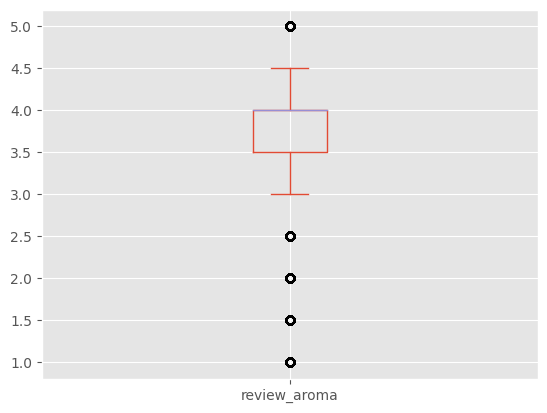

In [8]:
data['review_aroma'].plot(kind='box')

In [18]:
IQR = np.quantile(data['review_taste'],0.75) - np.quantile(data['review_taste'],0.25)

In [19]:
IQR

1.0

In [20]:
np.quantile(data['review_taste'],0.75),np.quantile(data['review_taste'],0.25)

(4.5, 3.5)

In [21]:
np.quantile(data['review_taste'], 0.5) == data['review_taste'].median(), np.quantile(data['review_taste'], 0.5)

(True, 4.0)

In [22]:
data['review_taste'].min(),data['review_taste'].max()

(1.0, 5.0)

<AxesSubplot: >

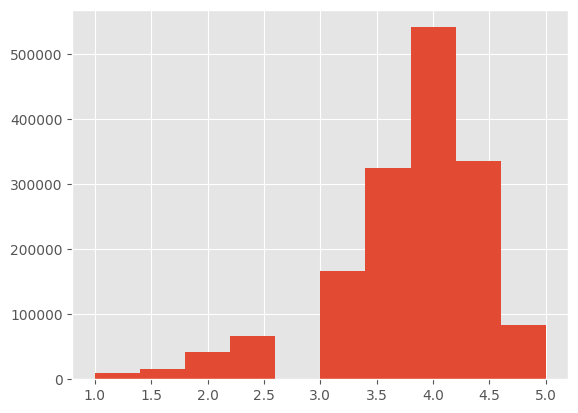

In [27]:
data['review_taste'].hist()

<AxesSubplot: ylabel='Density'>

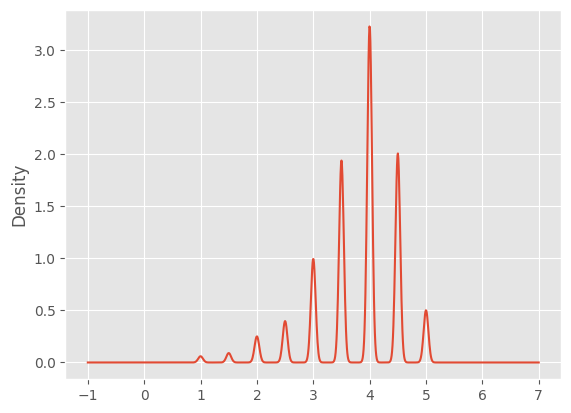

In [30]:
data['review_taste'].plot(kind ='kde')

<AxesSubplot: ylabel='review_taste'>

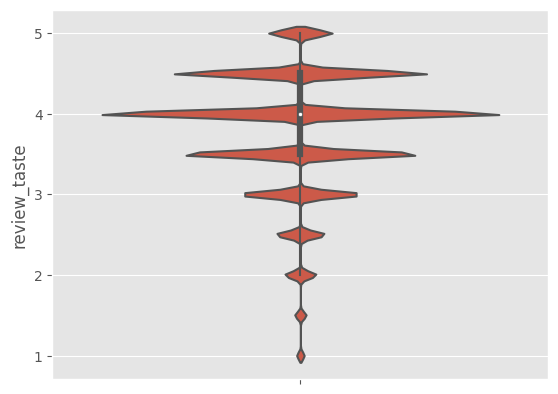

In [31]:
sns.violinplot(y = 'review_taste', data= data )

In [32]:
data['review_overall'].value_counts()

4.0    582764
4.5    324385
3.5    301817
3.0    165644
5.0     91320
2.5     58523
2.0     38225
1.5     12975
1.0     10954
0.0         7
Name: review_overall, dtype: int64

## Анализ категориальной информации

([<matplotlib.axis.XTick at 0x7f8dfaef1eb0>,
 [Text(0.01, 0, '0.01'), Text(57.7, 0, '57.7')])

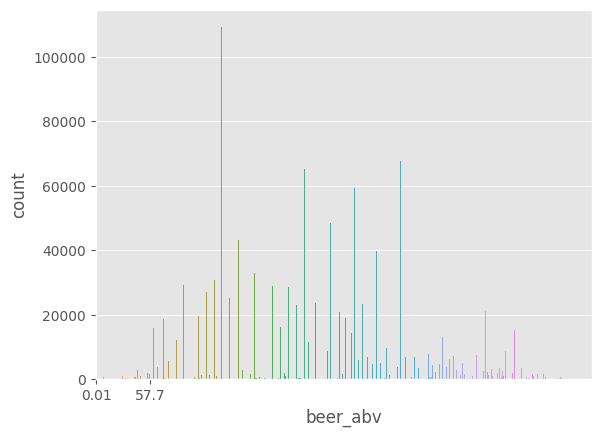

In [56]:
beer_abv_xticks = [data['beer_abv'].min(), data['beer_abv'].max()]
sns.countplot(x = 'beer_abv', data = data)
plt.xticks(beer_abv_xticks,beer_abv_xticks)

In [57]:
data['Y'] = data['review_taste']  > 50.0

<AxesSubplot: xlabel='review_overall', ylabel='count'>

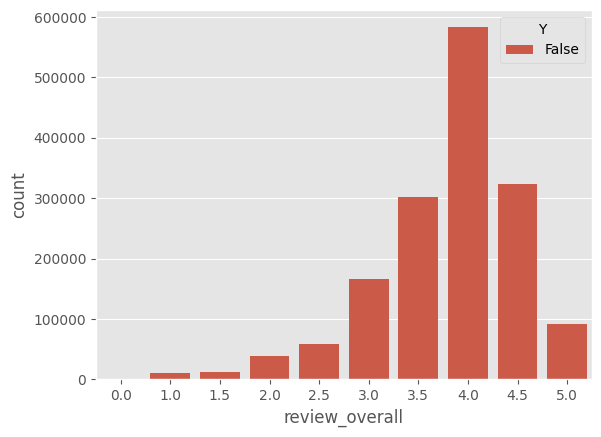

In [58]:
sns.countplot(x = 'review_overall',hue = 'Y', data = data )

In [59]:
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,Y
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,False
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,False
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,False
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,False
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,False
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,False
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,False
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,False


## Сравнение распределений признаков для разных классов

<AxesSubplot: xlabel='Y', ylabel='beer_abv'>

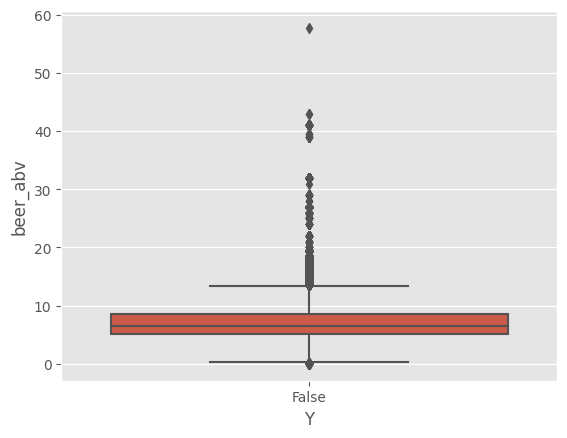

In [61]:
sns.boxplot(x ='Y', y = 'beer_abv', data = data)

## Анализ зависимости двух непрерывных переменных

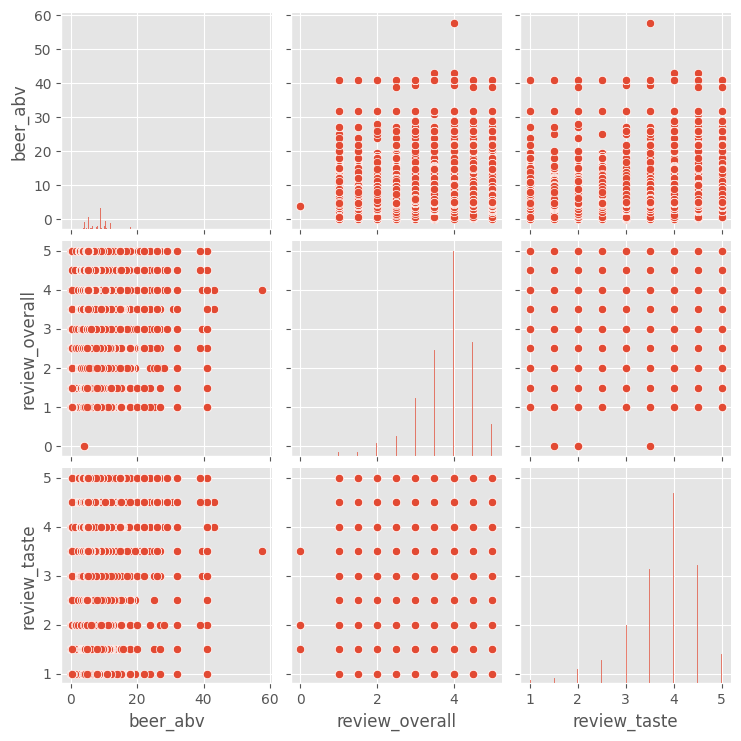

In [62]:
sns.pairplot(data[['beer_abv', 'beer_style','review_overall', 'review_taste']])

In [65]:
corr = data[['beer_abv','review_overall', 'review_taste']].corr()

In [66]:
corr

,beer_abv,review_overall,review_taste
beer_abv,1.000000,0.138512,0.290827
review_overall,0.138512,1.000000,0.789816
review_taste,0.290827,0.789816,1.000000


In [67]:
corr['review_overall']

beer_abv          0.138512
review_overall    1.000000
review_taste      0.789816
Name: review_overall, dtype: float64

<AxesSubplot: >

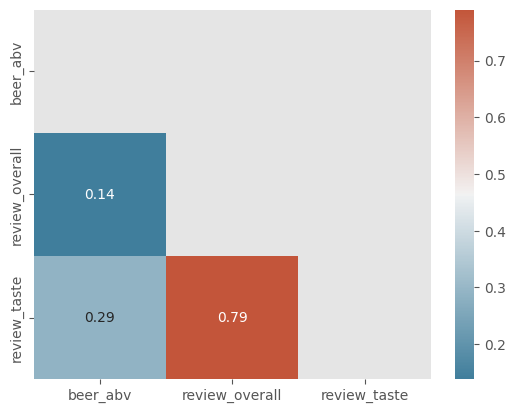

In [68]:
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,annot=True,mask=mask, cmap=cmap)

<AxesSubplot: xlabel='review_taste', ylabel='review_overall'>

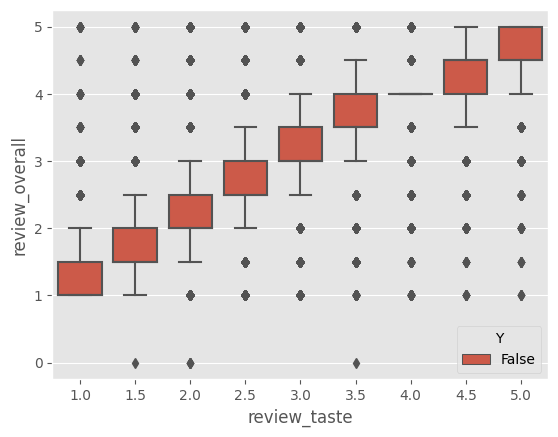

In [71]:
sns.boxplot(x= 'review_taste', y='review_overall',hue='Y',data = data)